In [ ]:
!pip install opencv-python
!pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from google.colab import drive
import os
import shutil
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import cv2
from skimage import io
# Load the Haar cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

#img = io.imread('/content/gdrive/MyDrive/FYP/image.jpg')
img = io.imread('/content/gdrive/MyDrive/FYP/Collage.jpg')

# Load the input image
#img = cv2.imread('/image.jpg')

# Convert the image to grayscale
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
face_s = face_cascade.detectMultiScale(img, 1.3, 5)
c = 0
# Save each face as a separate image
i = 0
if not os.path.exists("/content/tempface"):
    os.mkdir("/content/tempface")

for (x,y,w,h) in face_s:
    face = img[y:y+h, x:x+w] # Extract the region of the image defined by the bounding box
    # Resize the image to a desired size (e.g., 128x128)
    face = cv2.resize(face, (128, 128))
    os.mkdir('/content/tempface/s_{}'.format(i))
    filepath = '/content/tempface/s_{}'.format(i)
    cv2.imwrite(filepath + '/face_{}.jpg'.format(i), face)
    cv2.imwrite(filepath + '/face_0{}.jpg'.format(i), face)
    
    if os.path.exists(filepath + '/face_{}.jpg'.format(i)):
        # Open the JPEG image
        im = Image.open(filepath + '/face_{}.jpg'.format(i))
        # Convert the image to grayscale
        im = im.convert("L")
        # Save the image in PGM format
        im.save(filepath + '/face_{}.pgm'.format(i))
        os.remove(filepath + '/face_{}.jpg'.format(i))

    if os.path.exists(filepath + '/face_0{}.jpg'.format(i)):
        # Open the JPEG image
        im = Image.open(filepath + '/face_0{}.jpg'.format(i))
        # Convert the image to grayscale
        im = im.convert("L")
        # Save the image in PGM format
        im.save(filepath + '/face_0{}.pgm'.format(i))
        os.remove(filepath + '/face_0{}.jpg'.format(i))  
    c += 1
    i += 1

shutil.make_archive('/content/tempface', 'zip', '/content/tempface')

'/content/tempface.zip'

In [ ]:
for i in range(7):
    filepath = "/content/tempface/s_{}".format(i)
    if not os.path.exists("/content/tempface/s_{}".format(i)):
      continue
    else:
      if (os.path.exists(filepath + '/face_{}.jpg'.format(i))):
        os.remove(filepath + '/face_{}.jpg'.format(i))
      if (os.path.exists(filepath + '/face_0{}.jpg'.format(i))):
        os.remove(filepath + '/face_0{}.jpg'.format(i))
      if (os.path.exists(filepath + '/face_{}.pgm'.format(i))):
        os.remove(filepath + '/face_{}.pgm'.format(i))
      if (os.path.exists(filepath + '/face_0{}.pgm'.format(i))):
        os.remove(filepath + '/face_0{}.pgm'.format(i))

      if (os.path.exists("/content/tempface/s_{}".format(i))):
        os.rmdir("/content/tempface/s_{}".format(i))
    

if os.path.exists("/content/tempface.zip"):
    os.remove("/content/tempface.zip")  

In [4]:
faces = {}
with zipfile.ZipFile("/content/tempface.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # If we extracted files from zip, we can use cv2.imread(filename) instead
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)
print(faces)

{'s_0/face_00.pgm': array([[113, 111, 112, ..., 207, 207, 206],
       [110, 108, 108, ..., 207, 207, 206],
       [108, 106, 105, ..., 207, 207, 207],
       ...,
       [ 73,  74,  74, ..., 197, 198, 201],
       [ 72,  72,  73, ..., 194, 192, 202],
       [ 73,  73,  73, ..., 176, 183, 183]], dtype=uint8), 's_0/face_0.pgm': array([[113, 111, 112, ..., 207, 207, 206],
       [110, 108, 108, ..., 207, 207, 206],
       [108, 106, 105, ..., 207, 207, 207],
       ...,
       [ 73,  74,  74, ..., 197, 198, 201],
       [ 72,  72,  73, ..., 194, 192, 202],
       [ 73,  73,  73, ..., 176, 183, 183]], dtype=uint8), 's_2/face_02.pgm': array([[147, 178, 164, ..., 149,  89,  95],
       [126, 188, 173, ..., 151, 109, 112],
       [137, 134, 179, ..., 127, 113, 113],
       ...,
       [189, 191, 192, ...,  59,  55,  60],
       [195, 197, 197, ...,  58,  53,  58],
       [205, 207, 206, ...,  56,  51,  54]], dtype=uint8), 's_2/face_2.pgm': array([[147, 178, 164, ..., 149,  89,  95],
       [

In [5]:
# Print some details
for i in range(len(faces)):
  faceshape = list(faces.values())[i].shape
  print("Face image shape:", faceshape)

Face image shape: (128, 128)
Face image shape: (128, 128)
Face image shape: (128, 128)
Face image shape: (128, 128)
Face image shape: (128, 128)
Face image shape: (128, 128)


In [6]:
facematrix = []
facelabel = []
for key, val in faces.items():
    if key.startswith("s_1/"):
        continue # this is our test set
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[0])

print(facematrix)
print(facelabel)

[array([113, 111, 112, ..., 176, 183, 183], dtype=uint8), array([113, 111, 112, ..., 176, 183, 183], dtype=uint8), array([147, 178, 164, ...,  56,  51,  54], dtype=uint8), array([147, 178, 164, ...,  56,  51,  54], dtype=uint8)]
['s_0', 's_0', 's_2', 's_2']


In [7]:
# Create a NxM matrix with N images and M pixels per image
facematrix = np.array(facematrix, dtype=object)
print(facematrix)

# Apply PCA and take first K principal components as eigenfaces
pca = PCA().fit(facematrix)

n_components = 50
eigenfaces = pca.components_[:n_components]

[[113 111 112 ... 176 183 183]
 [113 111 112 ... 176 183 183]
 [147 178 164 ... 56 51 54]
 [147 178 164 ... 56 51 54]]


In [8]:
# Generate weights as a KxN matrix where K is the number of eigenfaces and N the number of samples
weights = eigenfaces @ (facematrix - pca.mean_).T
print("Shape of the weight matrix:", weights.shape)
print(weights)

Shape of the weight matrix: (4, 4)
[[4075.2238282087314 4075.2238282087314 -4075.2238282087314
  -4075.2238282087314]
 [-3.015292182606544e-11 -3.015292182606544e-11 3.015292182606544e-11
  3.015292182606544e-11]
 [1.9971350961878187e-13 1.9971350961878187e-13 -1.9971350961878187e-13
  -1.9971350961878187e-13]
 [-6.658111562085622e-13 -6.658111562085622e-13 6.658111562085622e-13
  6.658111562085622e-13]]


Best match s_2 with Euclidean distance 3081.725831


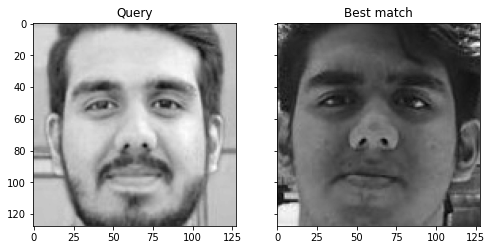

In [9]:
#@title
# Test on out-of-sample image of existing class
query = faces["s_1/face_01.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
weights = weights.astype(float)
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
facematrix = facematrix.astype(float)
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()